# CNN with AlexNet

We start image processing with another famous neural network architecture called AlexNet (circa 2012). AlexNet is the name of a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton, who was Krizhevsky's Ph.D. advisor.

AlexNet competed in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012.  The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (GPUs) during training.

> Krizhevsky, Alex; Sutskever, Ilya; Hinton, Geoffrey E. (2017-05-24). "ImageNet classification with deep convolutional neural networks" (PDF). Communications of the ACM. 60 (6): 84–90. doi:10.1145/3065386. ISSN 0001-0782. S2CID 195908774.
> 
> "ImageNet Large Scale Visual Recognition Competition 2012 (ILSVRC2012)". image-net.org.

The image processing task is: digit recognition using a well known "MNIST" dataset.

In [2]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import BatchNormalization

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

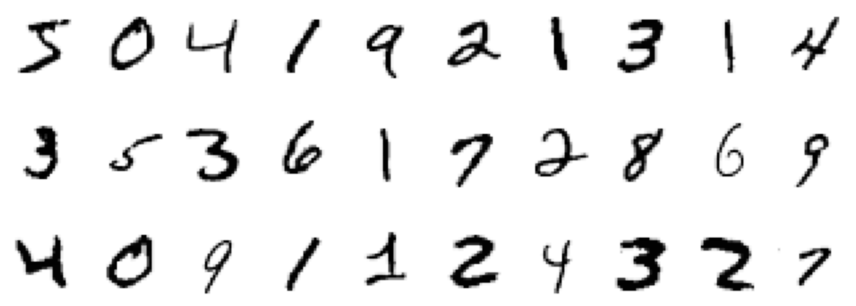

In [6]:
plt.figure(figsize=(12,5))
for k in range(30):
    plt.subplot(3,10,k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Preprocessing

Let's preprocess our images so that each pixel value is between 0.0 and 1.0 -- as floating point values.

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')

In [8]:
X_train /= 255.
X_valid /= 255.

In [9]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

## Neural Architecture

We replicate what Alex and team did with their "AlexNet" architecture.

In [10]:
# Input layer
i = Input((28, 28, 1))

# first conv-pool block
conv = Conv2D(96, kernel_size=(11,11), strides=(1,1), activation='relu')(i)
conv = MaxPooling2D(pool_size=(3,3), strides=(1,1))(conv)
conv = BatchNormalization()(conv)

# second conv-pool block
conv = Conv2D(256, kernel_size=(5,5), strides=(1,1), activation='relu')(conv)
conv = MaxPooling2D(pool_size=(3,3), strides=(1,1))(conv)
conv = BatchNormalization()(conv)

# third conv-pool block
conv = Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu')(conv)
conv = Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu')(conv)
conv = Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu')(conv)
conv = MaxPooling2D(pool_size=(3,3), strides=(1,1))(conv)
conv = BatchNormalization()(conv)

# dense layer
dense = Flatten()(conv)
dense = Dense(4096, activation='tanh')(dense)
dense = Dropout(0.5)(dense)
dense = Flatten()(dense)
dense = Dense(4096, activation='tanh')(dense)

dense = Dense(n_classes, activation='softmax')(dense)

# Model definition
model = Model(inputs=i, outputs=dense)

2022-10-27 22:52:44.780319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 18, 18, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0     

## Training & Validation

Because this is a categorical classification task, the loss function we use should be: "categorical crossentropy":

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['Precision', 'Recall', 'accuracy'])

In [13]:
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_valid, y_valid))

469/469 [==============================] - 470s 999ms/step - loss: 0.4535 - precision: 0.9359 - recall: 0.9297 - accuracy: 0.9315 - val_loss: 0.2748 - val_precision: 0.9375 - val_recall: 0.9332 - val_accuracy: 0.9352
